### Midterm Activity 2
Principal Component Analysis (PCA) <br>
Due Date: June 21, 2025

Objectives:
1. Apply Principal Component Analysis (PCA) as a method to reduce features of a high
dimensional dataset.
2. Discuss the benefits of using PCA.

##### Classification Model Development
Using the same dataset (glass.csv) from the previous activity, classify the dataset using the minimum <br>
number of principal components having at least 90% representation of the dataset.<br> Present the performance of the model with complete attributes and with the chosen components.

1. Data exploration and preprocessing
<br> - Data cleaning, data transformation and other data
preprocessing techniques as deemed necessary

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Load dataset
glass_df = pd.read_csv('../data/glass.csv')
print("Original dataset shape:", glass_df.shape)

# Check for missing values
print("\nMissing values per column:")
print(glass_df.isnull().sum())

# Drop idno column and separate features/target
x = glass_df.drop(['idno', 'type'], axis=1)
y = glass_df['type']
print("\nFeatures shape:", x.shape, "Target shape:", y.shape)

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


Original dataset shape: (214, 11)

Missing values per column:
idno    0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
type    0
dtype: int64

Features shape: (214, 9) Target shape: (214,)


2. Model Development
    <br> - For the model development, compare the performance of the classification model with all
features/attributes and with a reduced dataset using PCA.


Minimum components for 90% variance: 6


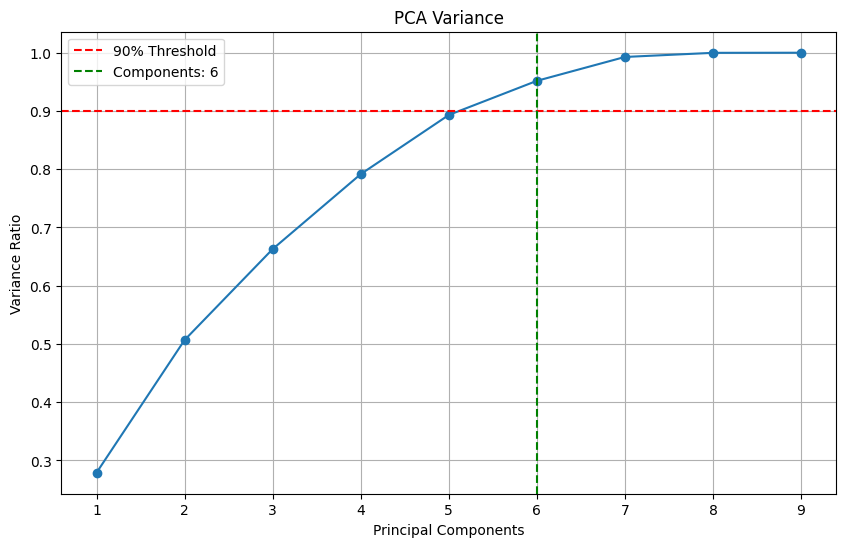

In [ ]:
# PCA Exploration
pca_full = PCA()
pca_full.fit(x_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find minimal components for ≥90% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print(f"\nMinimum components for 90% variance: {n_components}")

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axvline(x=n_components, color='g', linestyle='--', label=f'Components: {n_components}')
plt.xlabel('Principal Components')
plt.ylabel('Variance Ratio')
plt.title('PCA Variance')
plt.legend()
plt.grid()
plt.savefig('pca_variance.png')
plt.show()

# Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y, test_size=0.2, random_state=42
)

# Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Model 1 All Features
rf_all = rf.fit(x_train, y_train)
y_pred_all = rf_all.predict(x_test)

# Model 2 PCA Features
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
rf_pca = rf.fit(x_train_pca, y_train)
y_pred_pca = rf_pca.predict(x_test_pca)




3. Model Evaluation
<br>
● Use the appropriate performance metrics to evaluate the developed models. <br>
● To assess the constructed model's performance, use 8-fold cross validation with a 80%–20%
split between training and test data.

In [ ]:
from sklearn.exceptions import UndefinedMetricWarning
import warnings

# Suppress specific warnings that are not related
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

# 8-Fold Cross-Validation (80-20 split equivalent)
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

# Evaluate models using cross-validation
def evaluate_model(model, X_data, y_data):
    metrics = {
        'Accuracy': cross_val_score(model, X_data, y_data, cv=kfold, scoring='accuracy'),
        'Precision': cross_val_score(model, X_data, y_data, cv=kfold, scoring='precision_weighted'),
        'Recall': cross_val_score(model, X_data, y_data, cv=kfold, scoring='recall_weighted'),
        'F1-Score': cross_val_score(model, X_data, y_data, cv=kfold, scoring='f1_weighted')
    }
    return {k: np.mean(v) for k, v in metrics.items()}

# Get performance metrics
metrics_all = evaluate_model(rf, x_scaled, y)
metrics_pca = evaluate_model(rf, pca.transform(x_scaled), y)

# Display performance metrics
results_df = pd.DataFrame({
    'Attributes/Features': ['All Attributes', f'PCA ({n_components} Components)'],
    'Accuracy': [metrics_all['Accuracy'], metrics_pca['Accuracy']],
    'Precision': [metrics_all['Precision'], metrics_pca['Precision']],
    'Recall': [metrics_all['Recall'], metrics_pca['Recall']],
    'F1-Score': [metrics_all['F1-Score'], metrics_pca['F1-Score']]
})
print("\nModel Performance Comparison:")
print(results_df)


Model Performance Comparison:
  Attributes/Features  Accuracy  Precision    Recall  F1-Score
0      All Attributes  0.794160   0.777249  0.794160  0.774300
1  PCA (6 Components)  0.714566   0.653268  0.714566  0.676357
